In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import os

### Читаем данные записываем в переменную df

In [266]:
df = pd.read_csv('_data.csv')

In [267]:
df

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


### Удаляем незначемые колонки

In [268]:
df = df.drop(columns=['Тип', 'Телефоны', 'Описание', 'Unnamed: 0', 'Серия дома', 'Ссылка на объявление', 'Название ЖК', 'Площадь комнат, м2'])

In [269]:
df.head()

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет
2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),NaN
3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),NaN
4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)",Да


### Фильтруем DataFrame по Москве

In [270]:
df['Адрес'].value_counts()

Москва, Чапаевский переулок, 3                                       63
Москва, улица Василисы Кожиной, 13                                   46
Москва, улица 1-я Леонова, 18                                        42
Москва, Мосфильмовская улица, 8                                      37
Москва, Гостиничный проезд, 8К1                                      32
                                                                     ..
Краснодарский край, Сочи, Центральный мкр, улица Навагинская, 11А     1
Краснодарский край, Сочи, Центральный мкр, улица Нагорная, 19А        1
Краснодарский край, Сочи, Вишневая улица, 4                           1
Краснодарский край, Сочи, Заречный мкр, улица Чайковского, 2          1
Москва, Боровский проезд, 11                                          1
Name: Адрес, Length: 12850, dtype: int64

In [271]:
df['Адрес'] = df['Адрес'].apply(lambda x: x.split(', ')[0] if type(x) != float else x)

In [272]:
df['Адрес'].value_counts()

Москва                19737
Санкт-Петербург        3028
Краснодарский край      603
Name: Адрес, dtype: int64

In [273]:
df_msk = df[df['Адрес'] == 'Москва']

In [274]:
df_msk['Адрес'].value_counts()

Москва    19737
Name: Адрес, dtype: int64

## Колонка цена

In [275]:
stack = []
for row in df_msk['Цена']:
    stack.append(row)
stack_dol = []
stack_eur = []
index_eur = []
index_dol = []
for index, row in enumerate (stack):
    #print(index)
    if '€' in row:
        stack_eur.append(row)
        index_eur.append(index)
    elif '$' in row:
        stack_dol.append(row)
        index_dol.append(index)

#print(index_dol)
#print(index_eur)
df_msk["Цена за месяц числом"] = df_msk["Цена"].apply(lambda elem: elem.split(' ')[0])
df_msk["Цена залог"] = df_msk["Цена"].apply(lambda elem: elem.split("Залог -")[1].split(' ')[1] if 'Залог' in elem else 0)
df_msk['Комунальные услуги'] = df_msk["Цена"].apply(lambda elem: 'Да' if 'Коммунальные услуги включены' in elem else 'Нет')
for i in index_dol:
    df_msk["Цена за месяц числом"].iloc[i] = float(df_msk["Цена за месяц числом"].iloc[i]) * 75.91
    df_msk["Цена залог"].iloc[i] = float(df_msk["Цена залог"].iloc[i]) * 75.91

for i in index_eur:
    df_msk["Цена за месяц числом"].iloc[i] = float(df_msk["Цена за месяц числом"].iloc[i]) * 80.41
    df_msk["Цена залог"].iloc[i] = float(df_msk["Цена залог"].iloc[i]) * 80.41
    #print(df["Цена залог"].iloc[i])

df_msk["Цена за месяц числом"].value_counts(dropna=False)
# Преобразовать колонку в числовой формат
df_msk['Цена за месяц числом'] = df_msk['Цена за месяц числом'].astype(float)
    

/tmp/ipykernel_65060/369741696.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_65060/369741696.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_65060/369741696.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6

In [276]:
df_msk["Цена залог"].value_counts(dropna=False)

40000     1359
45000     1308
50000     1177
35000     1141
60000      807
          ... 
89500        1
90400        1
450006       1
4900         1
199900       1
Name: Цена залог, Length: 522, dtype: int64

In [277]:
df_msk["Цена залог"] = df_msk["Цена залог"].astype(float)
df_msk["Цена залог"].value_counts(dropna=False)
df_msk["Цена залог"].sort_values(ascending=False)
df_msk = df_msk.drop(index=[4501, 21231])

/tmp/ipykernel_65060/864591715.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* Удаляем строки с явно ошибочными залогами

### Заполняем пропущенные значения в столбце "Парковка"

In [278]:
df_msk['Парковка'].fillna('отсутствует', inplace=True)

In [279]:
pd.DataFrame(df_msk['Парковка'].value_counts(dropna=False))

,Парковка
отсутствует,11172
наземная,5283
подземная,2466
открытая,713
многоуровневая,100
на крыше,1


### Заполняем пропущенные значения в столбце "Ремонт"

In [280]:
df_msk['Ремонт'].fillna(method='ffill', inplace=True)

In [281]:
pd.DataFrame(df_msk['Ремонт'].value_counts(dropna=False))

,Ремонт
Косметический,8271
Евроремонт,8159
Дизайнерский,3151
Без ремонта,154


### Переводим значения в столбце "Высота потолков" в единую СИ

In [282]:
df_msk['Высота потолков, м'] = np.where(df_msk['Высота потолков, м'] > 100, df_msk['Высота потолков, м']/100, df_msk['Высота потолков, м'])

### Избавляемся от выбросов, заполняем их медианными значениями

In [283]:
df_msk['Высота потолков, м'] = np.where(df_msk['Высота потолков, м'] > 5, df_msk['Высота потолков, м'].median(), df_msk['Высота потолков, м']) # если высота потолка > 5м

In [284]:
df_msk['Высота потолков, м'] = np.where(df_msk['Высота потолков, м'] < 2, df_msk['Высота потолков, м'].median(), df_msk['Высота потолков, м']) # если высота потолка < 2м

### Заполняем пропущенные значения 

In [285]:
df_msk['Высота потолков, м'].fillna(round(df_msk['Высота потолков, м'].mean(), 2), inplace=True)

In [286]:
pd.DataFrame(df_msk['Высота потолков, м'].value_counts(dropna=False))

,"Высота потолков, м"
2.75,9356
2.64,4492
3.00,1191
2.70,929
2.48,675
...,...
2.73,1
4.05,1
2.52,1
2.43,1


### Обрабатываем колонку "Балкон"

In [287]:
df_msk['Балкон'] = df_msk['Балкон'].fillna('Балкон (0), Лоджия (0)') # заполняем пустые значения
df_msk['Кол-во лоджий'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Лоджия' else '(0)' for row in df_msk['Балкон']] # добавляем колонку 'Кол-во лоджий'
df_msk['Кол-во балконов'] = [row.split(' ')[1] if row.split(' ')[0] == 'Балкон' else '(0)' for row in df_msk['Балкон']] # добавляем колонку 'Кол-во балконов'

In [288]:
# заполняем колонки значениями типа int
df_msk['Кол-во лоджий'] = [row.split('(')[1] for row in df_msk['Кол-во лоджий']]
df_msk['Кол-во лоджий'] = [int(row.split(')')[0]) for row in df_msk['Кол-во лоджий']]
df_msk['Кол-во балконов'] = [row.split('(')[1] for row in df_msk['Кол-во балконов']]
df_msk['Кол-во балконов'] = [int(row.split(')')[0]) for row in df_msk['Кол-во балконов']]

In [289]:
pd.DataFrame(df_msk[['Кол-во балконов', 'Кол-во лоджий']].value_counts(dropna=False))

,,0
Кол-во балконов,Кол-во лоджий,
0,0,6630
1,0,6335
0,1,5031
1,1,610
0,2,537
2,0,423
3,0,45
0,3,42
1,2,21


### Количество комнат¶

Оставляем только NaN и количество комнат, затем заменяем NaN на медиану и приводит все в тип int

In [290]:
df_msk['Количество комнат'].value_counts(dropna=False)

1                   6644
2, Изолированная    4149
2                   2228
3                   1463
3, Изолированная    1404
3, Оба варианта      721
4                    601
2, Смежная           571
NaN                  535
2, Оба варианта      459
5                    214
4, Оба варианта      209
4, Изолированная     188
6                     83
3, Смежная            80
5, Оба варианта       75
5, Изолированная      40
6, Оба варианта       26
6, Изолированная      16
4, Смежная            13
1, Изолированная       6
5, Смежная             4
6, Смежная             3
1, Оба варианта        2
1, Смежная             1
Name: Количество комнат, dtype: int64

In [291]:
df_msk['Количество комнат'] = df_msk['Количество комнат'].apply(lambda x: float(x.split(', ')[0]) if type(x) != float else x)

In [292]:
df_msk['Количество комнат'].fillna(df_msk['Количество комнат'].median(), inplace=True)

In [293]:
df_msk['Количество комнат'] = df_msk['Количество комнат'].astype(int)

In [294]:
df_msk.dtypes

ID  объявления                int64
Количество комнат             int64
Метро                        object
Адрес                        object
Площадь, м2                  object
Дом                          object
Парковка                     object
Цена                         object
Ремонт                       object
Балкон                       object
Окна                         object
Санузел                      object
Можно с детьми/животными     object
Дополнительно                object
Высота потолков, м          float64
Лифт                         object
Мусоропровод                 object
Цена за месяц числом        float64
Цена залог                  float64
Комунальные услуги           object
Кол-во лоджий                 int64
Кол-во балконов               int64
dtype: object

In [295]:
df_msk['Количество комнат'].value_counts(dropna=False)

2    7942
1    6653
3    3668
4    1011
5     333
6     128
Name: Количество комнат, dtype: int64

### Строим графики

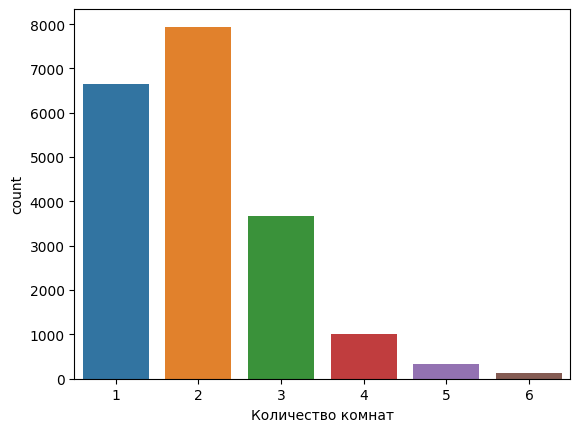

In [296]:
sns.countplot(x=df_msk['Количество комнат']);

In [297]:
data = pd.DataFrame(df_msk['Количество комнат'].value_counts())
px.pie(data, values='Количество комнат', names=data.index)

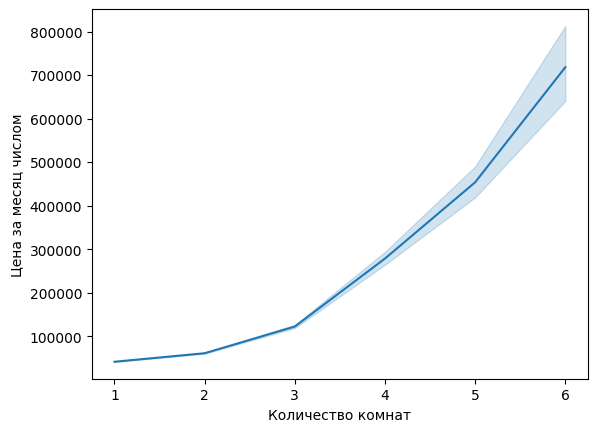

In [298]:
sns.lineplot(data=df_msk, x='Количество комнат', y='Цена за месяц числом');

Как видно из графиков значительную долю занимают 2-х комнатные квартиры, кроме того, стоимость квартиры напримую зависит от количества комнат.

### Колонка "Окна"¶

NaN значения заполним Модой, поскольку это категориальный признак

In [299]:
df_msk['Окна'].value_counts(dropna=False)

Во двор            9707
NaN                5149
На улицу и двор    2762
На улицу           2117
Name: Окна, dtype: int64

In [300]:
df_msk['Окна'].fillna(method='bfill', inplace=True)

In [301]:
df_msk['Окна'].value_counts(dropna=False)

Во двор            13130
На улицу и двор     3639
На улицу            2966
Name: Окна, dtype: int64

## Строим графики

In [302]:
data = pd.DataFrame(df_msk['Окна'].value_counts())
px.pie(data, values='Окна', names=data.index)

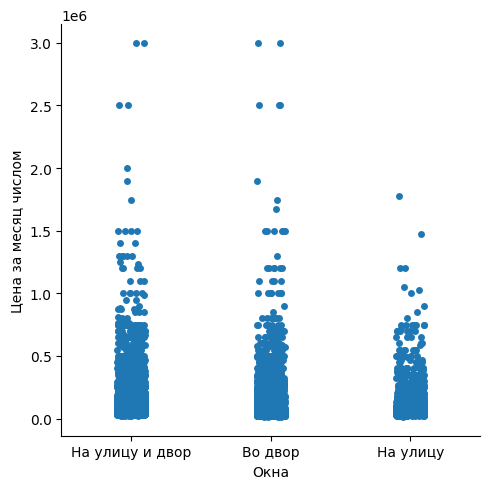

In [303]:
sns.catplot(data=df_msk, x='Окна', y='Цена за месяц числом');

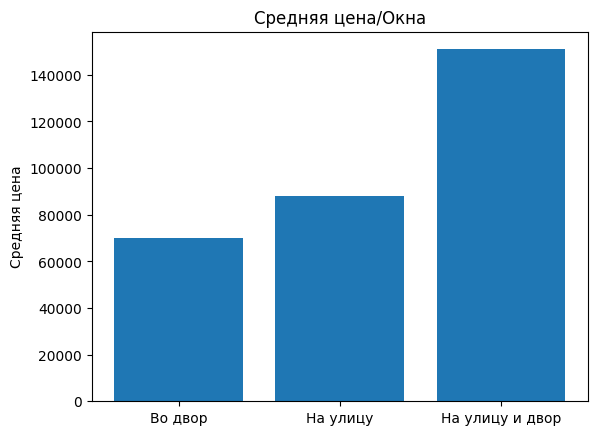

In [304]:
x = df_msk.groupby('Окна')['Цена за месяц числом'].mean().index.to_list()
y = df_msk.groupby('Окна')['Цена за месяц числом'].mean().values

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title("Средняя цена/Окна")
ax.set_ylabel('Средняя цена');

Как можно видеть большинство окон выходит во двор, но средняя цена выше при наличие в квартирах, как окон на улицу, так и во двор.

## Колонка "Можно с детьми/животными"¶

Разбили на две колонки "Можно с детьми" и "Можно с животными", со значениями 0 или 1

In [305]:
df_msk['Можно с детьми/животными'].value_counts(dropna=False)

Можно с детьми                       8540
Можно с детьми, Можно с животными    6075
NaN                                  4913
Можно с животными                     207
Name: Можно с детьми/животными, dtype: int64

In [306]:
df_msk['Можно с детьми/животными'].fillna('Нет', inplace=True)

In [307]:
df_msk['Можно с детьми'] = 0
df_msk['Можно с животными'] = 0

In [308]:
for item in df_msk['Можно с детьми/животными'].index:
    if 'Можно с детьми' in df_msk.loc[item, 'Можно с детьми/животными']:
        df_msk.loc[item, 'Можно с детьми'] = 1
    if 'Можно с животными' in df_msk.loc[item, 'Можно с детьми/животными']:
        df_msk.loc[item, 'Можно с животными'] = 1

In [309]:
df_msk.loc[:, ['Можно с детьми', 'Можно с животными']].isnull().sum()

Можно с детьми       0
Можно с животными    0
dtype: int64

In [310]:
df_msk.head()

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,...,"Высота потолков, м",Лифт,Мусоропровод,Цена за месяц числом,Цена залог,Комунальные услуги,Кол-во лоджий,Кол-во балконов,Можно с детьми,Можно с животными
0,271271157,4,м. Смоленская (9 мин пешком),Москва,200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"Балкон (0), Лоджия (0)",...,3.0,"Пасс (4), Груз (1)",Да,500000.0,500000.0,Да,0,0,1,1
1,271634126,4,м. Смоленская (8 мин пешком),Москва,198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"Балкон (0), Лоджия (0)",...,3.5,"Пасс (1), Груз (1)",Нет,500000.0,500000.0,Да,0,0,1,0
2,271173086,4,м. Смоленская (7 мин пешком),Москва,200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,"Балкон (0), Лоджия (0)",...,3.2,Пасс (1),NaN,500000.0,500000.0,Нет,0,0,1,0
3,272197456,4,м. Смоленская (3 мин пешком),Москва,170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,"Балкон (0), Лоджия (0)",...,3.2,Пасс (1),NaN,400000.0,400000.0,Нет,0,0,0,1
4,273614615,2,м. Арбатская (7 мин пешком),Москва,58.0/38.0/5.0,"12/26, Панельный",отсутствует,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,"Балкон (0), Лоджия (0)",...,3.9,"Пасс (1), Груз (1)",Да,225000.0,225000.0,Да,0,0,0,0


## Строим графики

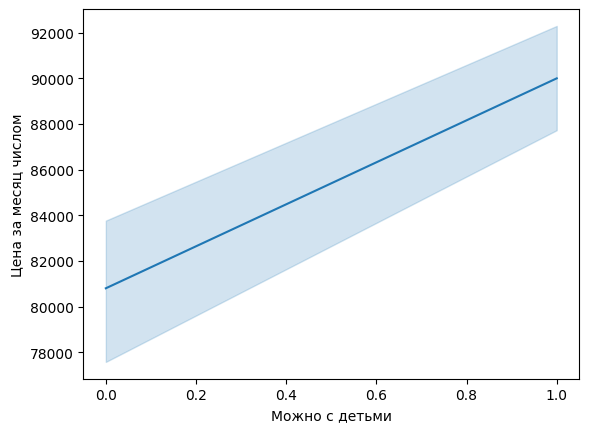

In [311]:
sns.lineplot(data=df_msk, x='Можно с детьми', y='Цена за месяц числом');

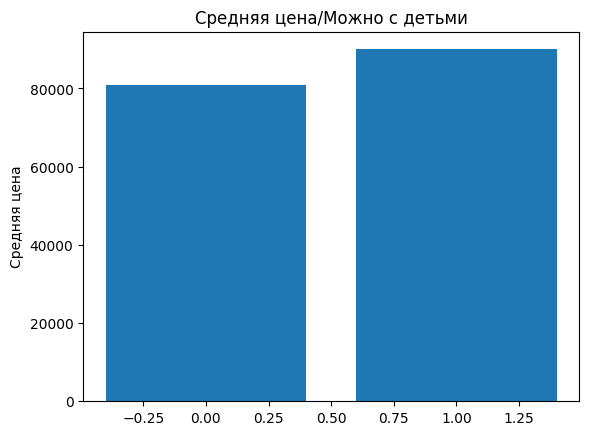

In [312]:
x = df_msk.groupby('Можно с детьми')['Цена за месяц числом'].mean().index.to_list()
y = df_msk.groupby('Можно с детьми')['Цена за месяц числом'].mean().values

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title("Средняя цена/Можно с детьми")
ax.set_ylabel('Средняя цена');

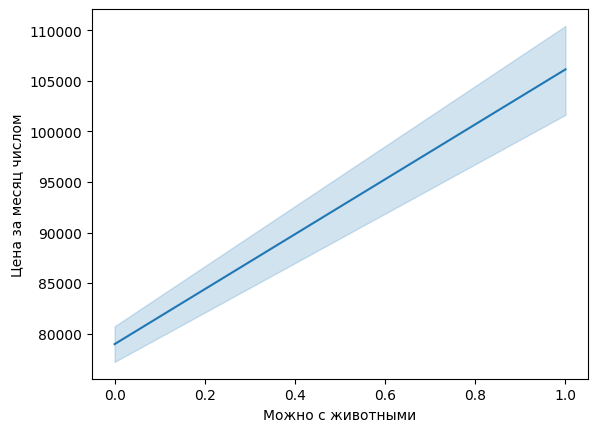

In [313]:
sns.lineplot(data=df_msk, x='Можно с животными', y='Цена за месяц числом');

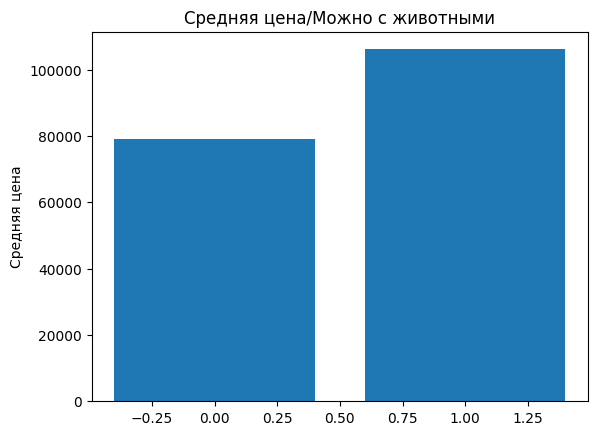

In [314]:
x = df_msk.groupby('Можно с животными')['Цена за месяц числом'].mean().index.to_list()
y = df_msk.groupby('Можно с животными')['Цена за месяц числом'].mean().values

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title("Средняя цена/Можно с животными")
ax.set_ylabel('Средняя цена');

Из графиков видно, что квартиры в которых моожно проживать с животными и/или детьми выше, чем квартиры в которых это запрещено.

## Колонка "Мусоропровод"

Заменим NaN

In [315]:
df_msk['Мусоропровод'].value_counts(dropna=False)

Да     10262
NaN     8005
Нет     1468
Name: Мусоропровод, dtype: int64

In [316]:
df_msk['Мусоропровод'].fillna('Нет', inplace=True)

In [317]:
df_msk['Мусоропровод'].value_counts(dropna=False)

Да     10262
Нет     9473
Name: Мусоропровод, dtype: int64

## Строим график

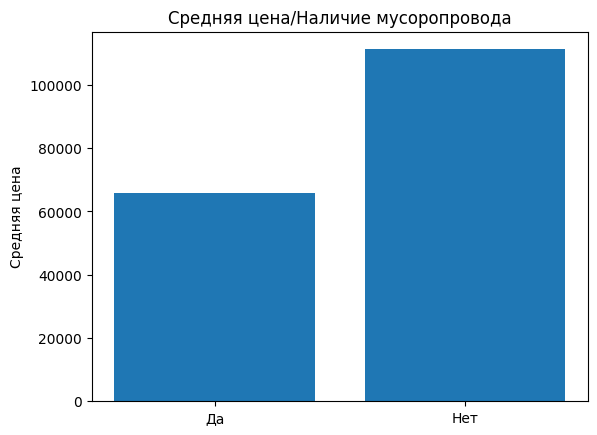

In [318]:
x = df_msk.groupby('Мусоропровод')['Цена за месяц числом'].mean().index.to_list()
y = df_msk.groupby('Мусоропровод')['Цена за месяц числом'].mean().values

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title("Средняя цена/Наличие мусоропровода")
ax.set_ylabel('Средняя цена');

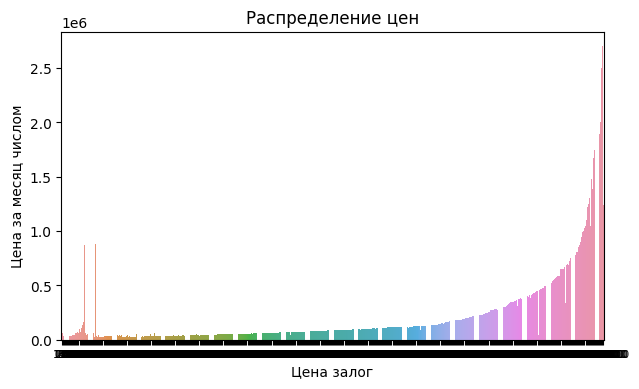

In [319]:
plt.figure(figsize=(7, 4))
mean_price = df_msk.groupby('Цена залог')['Цена за месяц числом'].mean().reset_index()
sns.barplot(data=mean_price, x='Цена залог', y='Цена за месяц числом')
plt.xticks(fontsize=7)
plt.title("Распределение цен")
plt.yticks()
plt.show()

* Из графика явна видна связь цены от залога

### Колонка Площадь, м2

In [320]:
# отсавляем только общую площадь
df_msk['Площадь, м2'] = df_msk['Площадь, м2'].apply(lambda elem: elem.split('/')[0])
df_msk['Площадь, м2'].value_counts(dropna=False)
df_msk["Площадь, м2"] = df_msk["Площадь, м2"].astype(float)

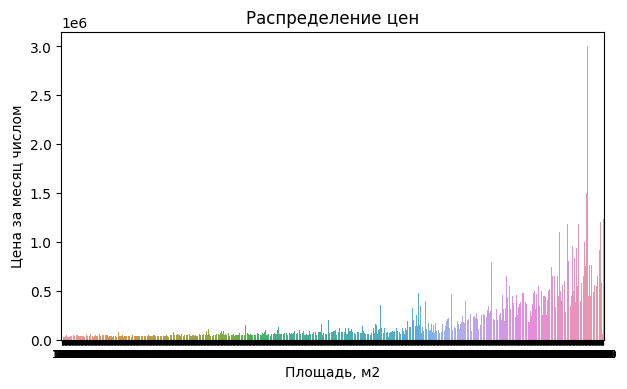

In [321]:
mean_price = df_msk.groupby('Площадь, м2')['Цена за месяц числом'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(data=mean_price, x='Площадь, м2', y='Цена за месяц числом')
plt.xticks(fontsize=7)
plt.title("Распределение цен")
plt.yticks()
plt.show()

* Из графика явна видна связь цены от от площади

##  Колонка Санузел

In [322]:
df_msk['Санузел'] = df_msk['Санузел'].fillna('(1)')
def san_split(text):
    if 'Совмещенный' in text and 'Раздельный' in text:
        return 'Оба'
    elif 'Совмещенный' in text:
        return 'Совмещенный'
    elif 'Раздельный' in text:
        return 'Раздельный'
    else:
        return 'Нет'
#разьиваем колонку
df_msk['Тип санузла'] = df_msk['Санузел'].apply(san_split)
#считаем количество
pattern = r'\((\d+)\)'
numbers = [re.findall(pattern, s) for s in df_msk['Санузел']]
numbers = [sum([int(n) for n in ns]) for ns in numbers]
df_msk['Число санузлов'] = numbers
df_msk[['Санузел','Тип санузла','Число санузлов']]


,Санузел,Тип санузла,Число санузлов
0,(1),Нет,1
1,"Совмещенный (2), Раздельный (1)",Оба,3
2,Совмещенный (3),Совмещенный,3
3,Совмещенный (3),Совмещенный,3
4,Совмещенный (2),Совмещенный,2
...,...,...,...
23363,Совмещенный (1),Совмещенный,1
23364,Совмещенный (1),Совмещенный,1
23365,Совмещенный (1),Совмещенный,1
23366,"Совмещенный (1), Раздельный (1)",Оба,2


* Разбиваем на две колонки тип санузла и число 
* Заполняем Nan '(1)'

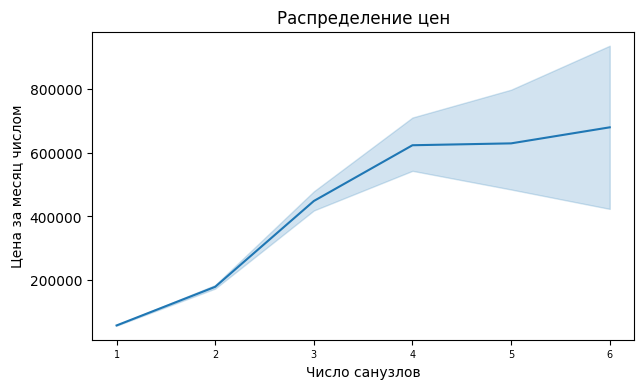

In [323]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=df_msk, x='Число санузлов', y='Цена за месяц числом')
plt.title("Распределение цен")
plt.xticks(fontsize=7)
plt.yticks()
plt.show()


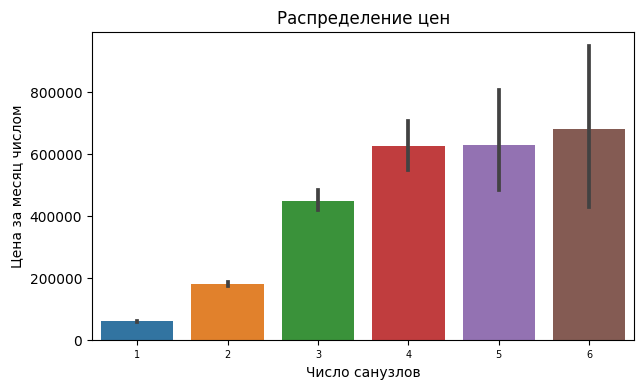

In [324]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df_msk, x="Число санузлов", y="Цена за месяц числом")
#sns.lineplot(data=df_msk, x='Число санузлов', y='Цена за месяц числом')
plt.xticks(fontsize=7)
plt.title("Распределение цен")
plt.yticks()
plt.show()


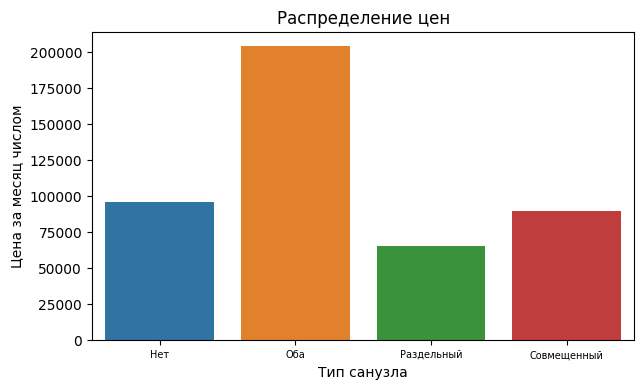

In [325]:
mean_price = df_msk.groupby('Тип санузла')['Цена за месяц числом'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(data=mean_price, x='Тип санузла', y='Цена за месяц числом')
#sns.displot(data=mean_price, x='Тип санузла', y='Цена за месяц числом')
plt.title("Распределение цен")
plt.xticks(fontsize=7)
plt.yticks()
plt.show()

### Колонка Метро

In [326]:

df_msk['Метро'] = df_msk['Метро'].fillna(method='bfill') 

new_df = df_msk['Метро'].str.split('(', n=1, expand=True)
new_df.columns = ['Название метро', 'Время до метро пешком']
df_msk['Время до метро пешком'] = new_df['Время до метро пешком'].str.extract('(\d+)')
df_msk['Название метро'] = new_df['Название метро']

df_msk[['Метро','Название метро','Время до метро пешком']]


,Метро,Название метро,Время до метро пешком
0,м. Смоленская (9 мин пешком),м. Смоленская,9
1,м. Смоленская (8 мин пешком),м. Смоленская,8
2,м. Смоленская (7 мин пешком),м. Смоленская,7
3,м. Смоленская (3 мин пешком),м. Смоленская,3
4,м. Арбатская (7 мин пешком),м. Арбатская,7
...,...,...,...
23363,м. Говорово (8 мин пешком),м. Говорово,8
23364,м. Солнцево (7 мин пешком),м. Солнцево,7
23365,м. Солнцево (6 мин пешком),м. Солнцево,6
23366,м. Солнцево (11 мин пешком),м. Солнцево,11


In [327]:
df_msk['Метро'] = df_msk['Метро'].fillna(method='ffill')  
new_df = df_msk['Метро'].str.split('(', n=1, expand=True)
new_df.columns = ['Название метро', 'Время до метро пешком']
df_msk['Время до метро пешком'] = new_df['Время до метро пешком'].str.extract('(\d+)')
df_msk['Название метро'] = new_df['Название метро']
df_msk['Время до метро пешком'] = df_msk['Время до метро пешком'].astype(float)


In [328]:
df_msk['Время до метро пешком'] = df_msk['Время до метро пешком'].fillna(df_msk['Время до метро пешком'].mean()) 


* Заполняем Nan занченями из следующей строки
* Разбиваем на две колонки содержащих название и время до метро

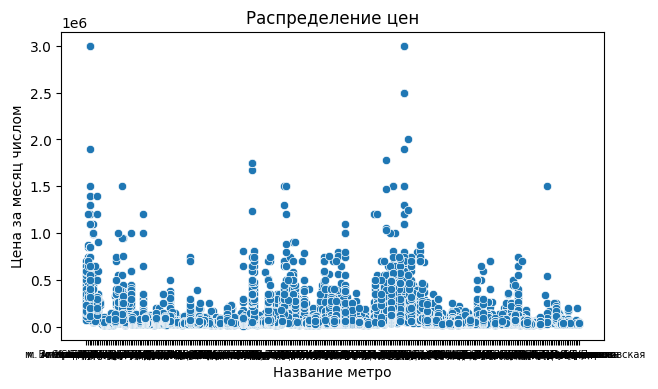

In [329]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df_msk, x="Название метро", y="Цена за месяц числом")
plt.xticks(fontsize=7)
plt.title("Распределение цен")
plt.yticks()
plt.show()


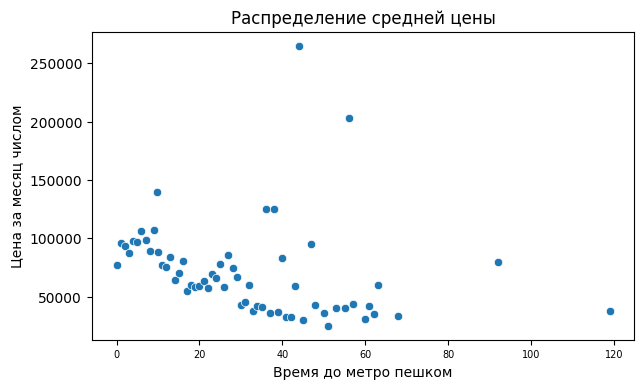

In [330]:
mean_price = df_msk.groupby('Время до метро пешком')['Цена за месяц числом'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.scatterplot(data=mean_price, x='Время до метро пешком', y='Цена за месяц числом')
plt.title("Распределение средней цены")
plt.xticks(fontsize=7)
plt.yticks()
plt.show()

* Заполняем Nan занченями из следующей строки
* Разбиваем на две колонки содержащих название и время до метро
* Удаляем колонку Метро, поскольку в ней слишком много категориальных меток, что может плохо сказаться на обучении модели


In [331]:
df_msk = df_msk.drop(columns=['Название метро'])

## Колонка Дом

In [332]:
df_msk['Дом'].value_counts(dropna=False)
# ячейка упрояющая разбивку
df_msk['Описание этажности'] = df_msk['Дом'].apply(lambda elem: elem.split(',')[0])
# разбиваем
df_msk['Этажность дома'] = df_msk['Описание этажности'].apply(lambda elem: elem.split('/')[1])
df_msk['Этаж квартиры'] = df_msk['Описание этажности'].apply(lambda elem: elem.split('/')[0])
df_msk['Тип дома'] = df_msk['Дом'].apply(lambda elem: elem.split(',')[1][1:] if len(elem) > 6 else 'Нет')
df_msk[['Дом','Этажность дома','Этаж квартиры', 'Тип дома']]
df_msk['Тип дома'].value_counts(dropna=False)
df_msk["Этажность дома"] = df_msk["Этажность дома"].astype(int)
df_msk["Этаж квартиры"] = df_msk["Этаж квартиры"].astype(int)


* Разбиваем на три колонки содержащих тип дома и этажность дома и этаж квартиры

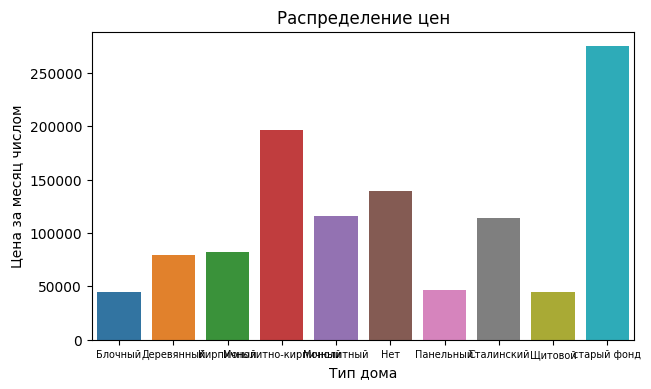

In [333]:
mean_price = df_msk.groupby('Тип дома')['Цена за месяц числом'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(data=mean_price, x='Тип дома', y='Цена за месяц числом')
plt.title("Распределение цен")
plt.xticks(fontsize=7)
plt.yticks()
plt.show()

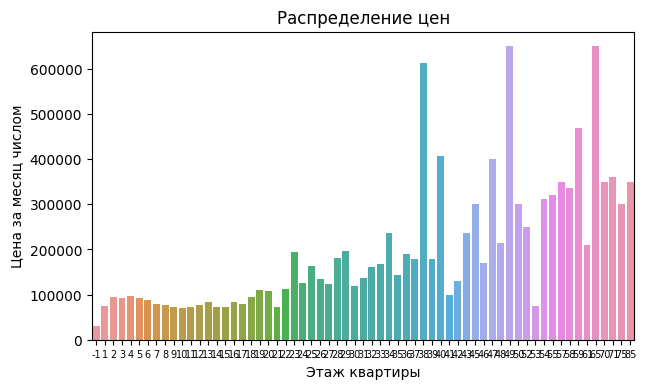

In [334]:
mean_price = df_msk.groupby('Этаж квартиры')['Цена за месяц числом'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(data=mean_price, x='Этаж квартиры', y='Цена за месяц числом')
plt.title("Распределение цен")
plt.xticks(fontsize=7)
plt.yticks()
plt.show()

* Видно что есть отрицательный этаж удаляем эту строку

In [335]:
df_msk['Этаж квартиры'].sort_values()
df_msk = df_msk.drop(index=[217])

## Лифт

In [336]:
df_msk['Лифт'] = df_msk['Лифт'].fillna('Нет')
def san_split(text):
    if 'Пасс' in text and 'Груз' in text:
        return 'Оба'
    elif 'Пасс' in text:
        return 'Пасс'
    elif 'Груз' in text:
        return 'Груз'
    else:
        return 'Нет'
#разьиваем колонку
df_msk['Тип лифта'] = df_msk['Лифт'].apply(san_split)
#считаем количество
pattern = r'\((\d+)\)'
numbers = [re.findall(pattern, s) for s in df_msk['Лифт']]
numbers = [sum([int(n) for n in ns]) for ns in numbers]
df_msk['Число лифтов'] = numbers
df_msk[['Лифт','Тип лифта','Число лифтов']]

,Лифт,Тип лифта,Число лифтов
0,"Пасс (4), Груз (1)",Оба,5
1,"Пасс (1), Груз (1)",Оба,2
2,Пасс (1),Пасс,1
3,Пасс (1),Пасс,1
4,"Пасс (1), Груз (1)",Оба,2
...,...,...,...
23363,"Пасс (1), Груз (1)",Оба,2
23364,"Пасс (1), Груз (1)",Оба,2
23365,Нет,Нет,0
23366,Пасс (3),Пасс,3


* Разбиваем на две колонки тип лифта и число 
* Заполняем Nan 'Нет'

In [337]:
# Избавляемся от явных некорректных значений

df_msk['Число лифтов'] = np.where(df_msk['Число лифтов'] > 20, df_msk['Число лифтов'].median(), df_msk['Число лифтов'])

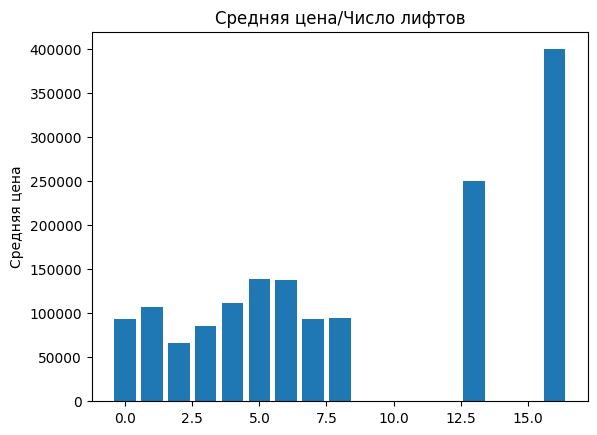

In [338]:
x = df_msk.groupby('Число лифтов')['Цена за месяц числом'].mean().index.to_list()
y = df_msk.groupby('Число лифтов')['Цена за месяц числом'].mean().values

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title("Средняя цена/Число лифтов")
ax.set_ylabel('Средняя цена');

## Удаляем лишние колонки

In [339]:
df_msk = df_msk.drop(columns=['Метро', 'Дом', 'Цена', 'Балкон', 'Санузел', 'Можно с детьми/животными', 'Дополнительно', 'Лифт', 'Описание этажности'])

In [340]:
len(df_msk.columns)

24

### Зависимость наличия и типа парковки и стоимости месячной аренды квартиры

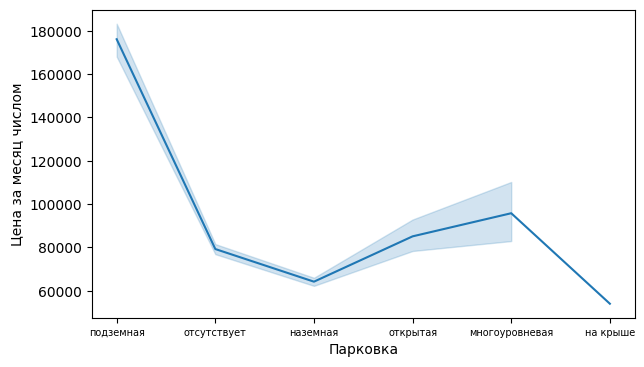

In [341]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=df_msk, x='Парковка', y='Цена за месяц числом')
plt.xticks(fontsize=7)
plt.show()

### Корреляция цены за месяц и высоты потолков

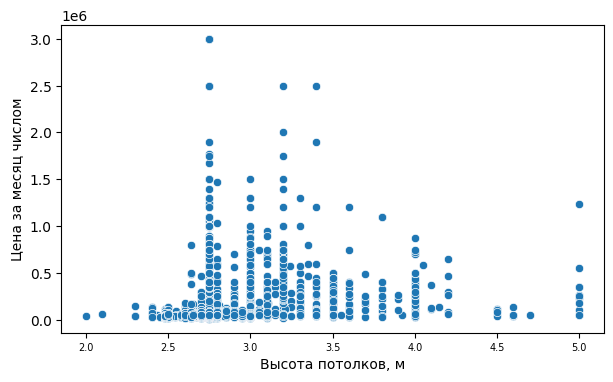

In [342]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df_msk, x='Высота потолков, м', y='Цена за месяц числом')
plt.xticks(fontsize=7)
plt.show()

### Соотношение стоимости месячной аренды и типа ремонта квартиры

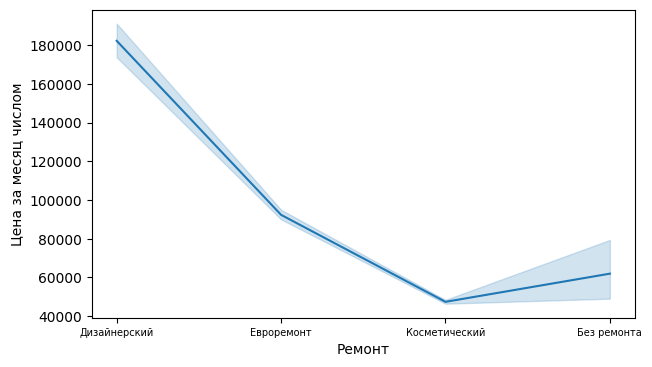

In [343]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=df_msk, x='Ремонт', y='Цена за месяц числом')
plt.xticks(fontsize=7)
plt.show()

### Соотношение цены квартиры и суммы количества балконов и лоджий 

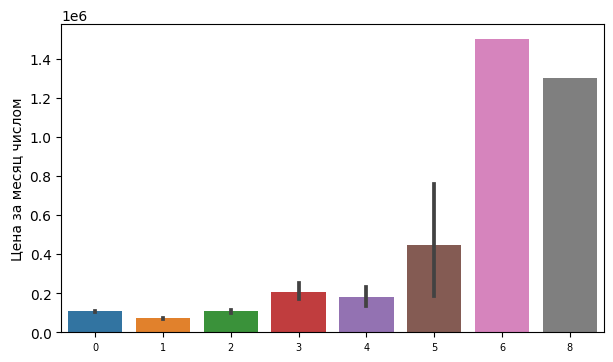

In [344]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df_msk, x=df_msk['Кол-во балконов'] + df_msk['Кол-во лоджий'], y='Цена за месяц числом')
plt.xticks(fontsize=7)
plt.show()

### Переименовываем колонки

In [345]:
df_msk.rename(columns={'ID  объявления': 'Listing_ID',
        'Количество комнат': 'Rooms_qty',
        'Название метро': 'Subway_station',
        'Адрес': 'Address',
        'Площадь, м2': 'Square_area',
        'Тип дома': 'Builging_type',
        'Парковка': 'Parking',
        'Цена за месяц числом': 'Monthly_payment',
        'Ремонт': 'Renovation',
        'Окна': 'Windows',
        'Число санузлов': 'Bathrooms_qty',
        'Можно с детьми': 'Children_allowed',
        'Можно с животными': 'Pets_allowed',
        'Дополнительно': 'Additional_info',
        'Высота потолков, м': 'Ceilings_height',
        'Тип лифта': 'Lift_type',
        'Мусоропровод': 'Trash_duct',
        'Кол-во лоджий': 'Loggia_qty',
        'Кол-во балконов': 'Balcony_qty',
        'Цена залог': 'Advance_payment',
        'Комунальные услуги': 'Utilities_bill',
        'Тип санузла': 'Bathroom_type',
        'Время до метро пешком': 'Time_to_metro',
        'Этажность дома': 'floor_qty',
        'Этаж квартиры': 'Apartment_floor',
        'Число лифтов': 'Lifts_qty'}, inplace=True)

In [346]:
df_msk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19734 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing_ID        19734 non-null  int64  
 1   Rooms_qty         19734 non-null  int64  
 2   Address           19734 non-null  object 
 3   Square_area       19734 non-null  float64
 4   Parking           19734 non-null  object 
 5   Renovation        19734 non-null  object 
 6   Windows           19734 non-null  object 
 7   Ceilings_height   19734 non-null  float64
 8   Trash_duct        19734 non-null  object 
 9   Monthly_payment   19734 non-null  float64
 10  Advance_payment   19734 non-null  float64
 11  Utilities_bill    19734 non-null  object 
 12  Loggia_qty        19734 non-null  int64  
 13  Balcony_qty       19734 non-null  int64  
 14  Children_allowed  19734 non-null  int64  
 15  Pets_allowed      19734 non-null  int64  
 16  Bathroom_type     19734 non-null  object

In [347]:
df_msk

,Listing_ID,Rooms_qty,Address,Square_area,Parking,Renovation,Windows,Ceilings_height,Trash_duct,Monthly_payment,...,Children_allowed,Pets_allowed,Bathroom_type,Bathrooms_qty,Time_to_metro,floor_qty,Apartment_floor,Builging_type,Lift_type,Lifts_qty
0,271271157,4,Москва,200.0,подземная,Дизайнерский,На улицу и двор,3.00,Да,500000.0,...,1,1,Нет,1,9.0,16,5,Монолитный,Оба,5.0
1,271634126,4,Москва,198.0,подземная,Дизайнерский,На улицу и двор,3.50,Нет,500000.0,...,1,0,Оба,3,8.0,16,5,Монолитно-кирпичный,Оба,2.0
2,271173086,4,Москва,200.0,подземная,Евроремонт,На улицу и двор,3.20,Нет,500000.0,...,1,0,Совмещенный,3,7.0,16,5,Нет,Пасс,1.0
3,272197456,4,Москва,170.0,подземная,Евроремонт,На улицу и двор,3.20,Нет,400000.0,...,0,1,Совмещенный,3,3.0,6,5,Нет,Пасс,1.0
4,273614615,2,Москва,58.0,отсутствует,Евроремонт,На улицу и двор,3.90,Да,225000.0,...,0,0,Совмещенный,2,7.0,26,12,Панельный,Оба,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,2,Москва,35.0,отсутствует,Евроремонт,Во двор,2.75,Нет,42000.0,...,0,0,Совмещенный,1,8.0,14,10,Нет,Оба,2.0
23364,274654844,1,Москва,38.7,отсутствует,Евроремонт,Во двор,2.75,Нет,45000.0,...,0,0,Совмещенный,1,7.0,18,5,Монолитный,Оба,2.0
23365,268679909,2,Москва,43.1,отсутствует,Дизайнерский,На улицу и двор,2.75,Нет,50000.0,...,1,0,Совмещенный,1,6.0,5,5,Кирпичный,Нет,0.0
23366,274807525,2,Москва,52.5,наземная,Евроремонт,Во двор,2.65,Да,55000.0,...,0,0,Оба,2,11.0,23,8,Монолитный,Пасс,3.0


In [348]:
df_msk['Rooms_qty'] = (df_msk['Rooms_qty'] - df_msk['Rooms_qty'].mean()) / df_msk['Rooms_qty'].std()
df_msk['Square_area'] = (df_msk['Square_area'] - df_msk['Square_area'].mean()) / df_msk['Square_area'].std()
df_msk['Ceilings_height'] = (df_msk['Ceilings_height'] - df_msk['Ceilings_height'].mean()) / df_msk['Ceilings_height'].std()
df_msk['Monthly_payment'] = (df_msk['Monthly_payment'] - df_msk['Monthly_payment'].mean()) / df_msk['Monthly_payment'].std()
df_msk['Advance_payment'] = (df_msk['Advance_payment'] - df_msk['Advance_payment'].mean()) / df_msk['Advance_payment'].std()
df_msk['Loggia_qty'] = (df_msk['Loggia_qty'] - df_msk['Loggia_qty'].mean()) / df_msk['Loggia_qty'].std()
df_msk['Balcony_qty'] = (df_msk['Balcony_qty'] - df_msk['Balcony_qty'].mean()) / df_msk['Balcony_qty'].std()
df_msk['Children_allowed'] = (df_msk['Children_allowed'] - df_msk['Children_allowed'].mean()) / df_msk['Children_allowed'].std()
df_msk['Pets_allowed'] = (df_msk['Pets_allowed'] - df_msk['Pets_allowed'].mean()) / df_msk['Pets_allowed'].std()
df_msk['Bathrooms_qty'] = (df_msk['Bathrooms_qty'] - df_msk['Bathrooms_qty'].mean()) / df_msk['Bathrooms_qty'].std()
df_msk['Time_to_metro'] = (df_msk['Time_to_metro'] - df_msk['Time_to_metro'].mean()) / df_msk['Time_to_metro'].std()
df_msk['floor_qty'] = (df_msk['floor_qty'] - df_msk['floor_qty'].mean()) / df_msk['floor_qty'].std()
df_msk['Apartment_floor'] = (df_msk['Apartment_floor'] - df_msk['Apartment_floor'].mean()) / df_msk['Apartment_floor'].std()
df_msk['Lifts_qty'] = (df_msk['Lifts_qty'] - df_msk['Lifts_qty'].mean()) / df_msk['Lifts_qty'].std()

In [349]:
# создаем экземпляр класса LabelEncoder
le = LabelEncoder()
# кодируем категории в числа
df_msk['Address'] = le.fit_transform(df_msk['Address'])
df_msk['Parking'] = le.fit_transform(df_msk['Parking'])
df_msk['Renovation'] = le.fit_transform(df_msk['Renovation'])
df_msk['Windows'] = le.fit_transform(df_msk['Windows'])
df_msk['Trash_duct'] = le.fit_transform(df_msk['Trash_duct'])
df_msk['Utilities_bill'] = le.fit_transform(df_msk['Utilities_bill'])
df_msk['Bathroom_type'] = le.fit_transform(df_msk['Bathroom_type'])
df_msk['Builging_type'] = le.fit_transform(df_msk['Builging_type'])
df_msk['Lift_type'] = le.fit_transform(df_msk['Lift_type'])

In [350]:
df_msk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19734 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing_ID        19734 non-null  int64  
 1   Rooms_qty         19734 non-null  float64
 2   Address           19734 non-null  int64  
 3   Square_area       19734 non-null  float64
 4   Parking           19734 non-null  int64  
 5   Renovation        19734 non-null  int64  
 6   Windows           19734 non-null  int64  
 7   Ceilings_height   19734 non-null  float64
 8   Trash_duct        19734 non-null  int64  
 9   Monthly_payment   19734 non-null  float64
 10  Advance_payment   19734 non-null  float64
 11  Utilities_bill    19734 non-null  int64  
 12  Loggia_qty        19734 non-null  float64
 13  Balcony_qty       19734 non-null  float64
 14  Children_allowed  19734 non-null  float64
 15  Pets_allowed      19734 non-null  float64
 16  Bathroom_type     19734 non-null  int64 